In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import

In [218]:
dete = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])
tafe = pd.read_csv('tafe_survey.csv')

# save the original dataframes for future reference
dete_og, tafe_og = dete, tafe

For this analysis we will use two primary sources of data.  The first is a set of employee exit surveys collected by the Department of Education, Training and Employment (DETE) in Queensland, Australia.  The second is a similar set of exit surveys collected by the Technical and Further Education (TAFE) institute, also in Queensland.

In particular, we want to consider the following questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

# Exploring the Data

Before we begin analysis and cleaning, we will spend a moment to familiarize ourselves with the two datasets.

## DETE Dataset

Department of Education, Training and Employment employee exit surveys (822 rows, 56 columns)

In [219]:
dete.head(3)

ID                    SeparationType Cease Date  DETE Start Date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER)    05/2012           2011.0   

   Role Start Date         Position Classification          Region  \
0           2004.0   Public Servant        A01-A04  Central Office   
1              NaN   Public Servant        AO5-AO7  Central Office   
2           2011.0  Schools Officer            NaN  Central Office   

                       Business Unit    Employment Status  ...  Kept informed  \
0  Corporate Strategy and Peformance  Permanent Full-time  ...              N   
1  Corporate Strategy and Peformance  Permanent Full-time  ...              N   
2               Education Queensland  Permanent Full-time  ...              N   

   Wellness programs  Health & Safety  Gender          Age  Aboriginal  \
0                  N                N    Male        56-60         NaN   
1                  N                N    Male        56-60         NaN   
2                  N                N    Male  61 or older         NaN   

   Torres Strait  South Sea  Disability  NESB  
0            NaN        NaN         NaN   Yes  
1            NaN        NaN         NaN   NaN  
2            NaN        NaN         NaN   NaN  

[3 rows x 56 columns]

### Missing Data

We can examine missing data in the DETE set by generating a heatmap in Seaborn.  The dark areas indicate where data is present, and the light areas indicate null values.

See below that certain columns (Classification, Business Unit, and the final 5 columns) have an abundance of null values.  We may consider dropping these columns at a later time.

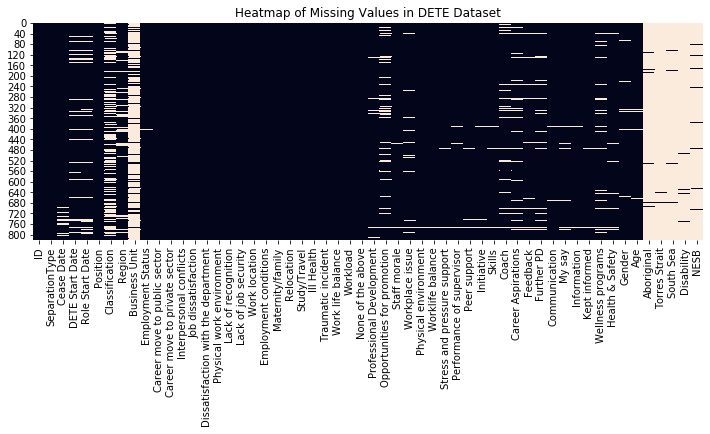

In [220]:
plt.figure(figsize=(12,4))
sns.heatmap(dete.isnull(), cbar=False)
plt.title('Heatmap of Missing Values in DETE Dataset')
plt.show()

### Drop Columns

After examining the distribution of null values and the usefulness of each column, we determine that many of the columns in the DETE set are either comprimised or superfluous to our analysis.

In [221]:
dete.drop(dete.columns[28:49], axis=1, inplace=True)

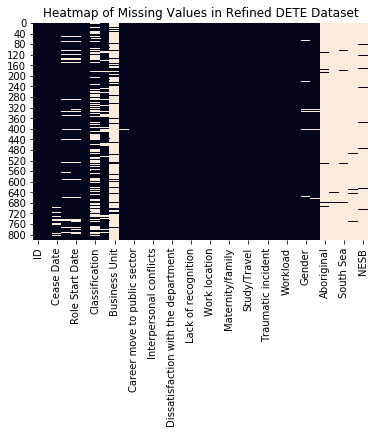

In [222]:
plt.figure(figsize=(6,4))
sns.heatmap(dete.isnull(), cbar=False)
plt.title('Heatmap of Missing Values in Refined DETE Dataset')
plt.show()

## TAFE Dataset

Technical and Further Education Institute employee exit surveys (702 rows, 72 columns).

In [223]:
tafe.head(3)

Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                                                  -   

  Contributing Factors. Career Move - Private Sector   \
0                                                NaN    
1                                                  -    
2                                                  -    

  Contributing Factors. Career Move - Self-employment  \
0                                                NaN    
1                                                  -    
2                                                  -    

  Contributing Factors. Ill Health Contributing Factors. Maternity/Family  \
0                              NaN                                    NaN   
1                                -                                      -   
2                                -                                      -   

   ...  \
0  ...   
1  ...   
2  ...   

  Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?  \
0                                                Yes                                                            
1                                                Yes                                                            
2                                                Yes                                                            

  Workplace. Topic:Does your workplace promote and practice the principles of employment equity?  \
0                                                Yes                                               
1                                                Yes                                               
2                                                Yes                                               

  Workplace. Topic:Does your workplace value the diversity of its employees?  \
0                                                Yes                           
1                                                Yes                           
2                                                Yes                           

  Workplace. Topic:Would you recommend the Institute as an employer to others?  \
0                                                Yes                             
1                                                Yes                             
2                                                Yes                             

  Gender. What is your Gender? CurrentAge. Current Age  \
0                       Female                  26  30   
1                          NaN                     NaN   
2                          NaN                     NaN   

  Employment Type. Employment Type Classification. Classification  \
0              Temporary Full-time            Administration (AO)   
1                              NaN                            NaN   
2                              NaN                            NaN   

  LengthofServiceOverall. Overall Length of Service at Institute (in years)  \
0                                                1-2                          
1                                                NaN                          
2                                                NaN                          

  LengthofServiceCurrent. Length of Service at current workplace (in years)  
0                     

One immediate observation is that many of the column names in the TAFE set are quite long and unwieldy.  If we plan to use these columns for analysis purposes, it may be wise to rename them first.

### Missing Data

As above, we generate a heatmap where the light areas represent null values.

In the TAFE data we see there are many rows which have primarily null data, and only a handful of columns with no null values.  We will later examine whether it is neccessary to drop certain rows or columns prior to our analysis.

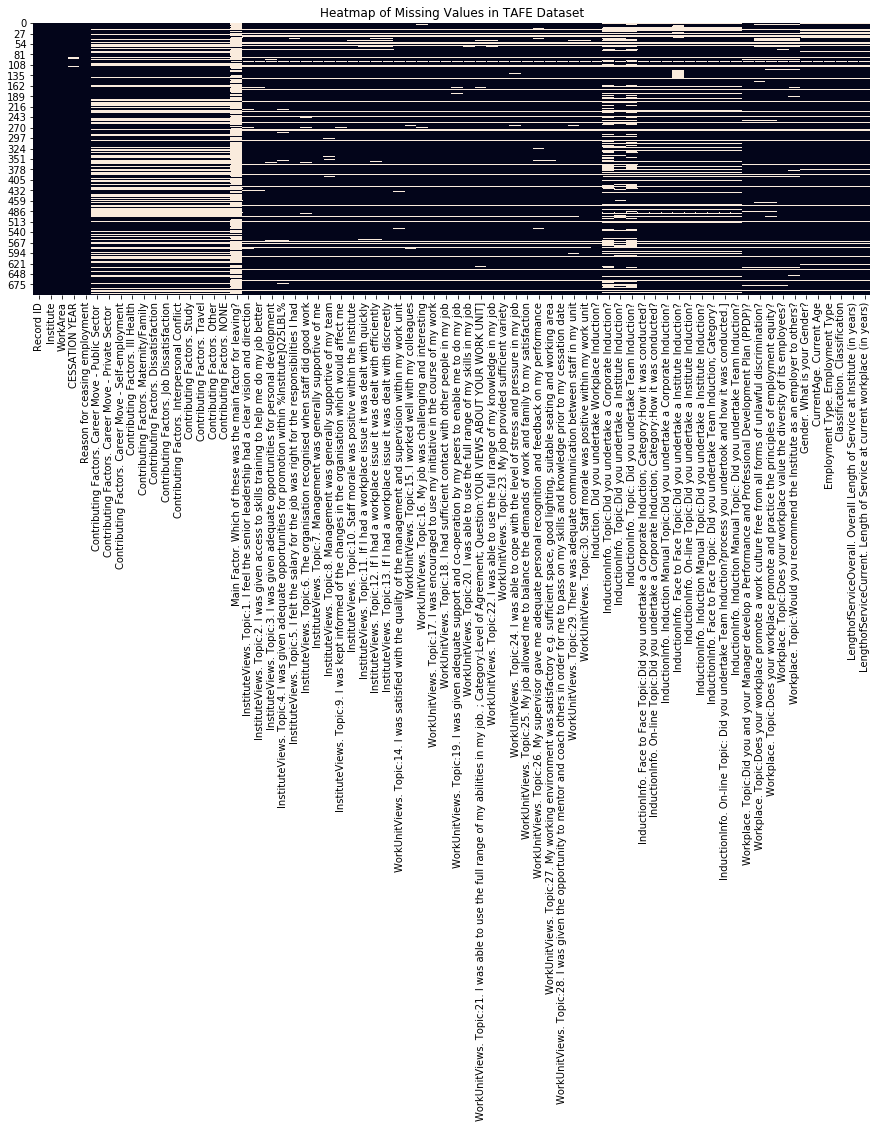

In [224]:
plt.figure(figsize=(15,5))
sns.heatmap(tafe.isnull(), cbar=False)
plt.title('Heatmap of Missing Values in TAFE Dataset')
plt.show()

### Drop Columns

After examining the distribution of null values and the usefulness of each column, we determine that many of the columns in the TAFE set are either comprimised or superfluous to our analysis.

In [225]:
tafe.drop(tafe.columns[17:66], axis=1, inplace=True)

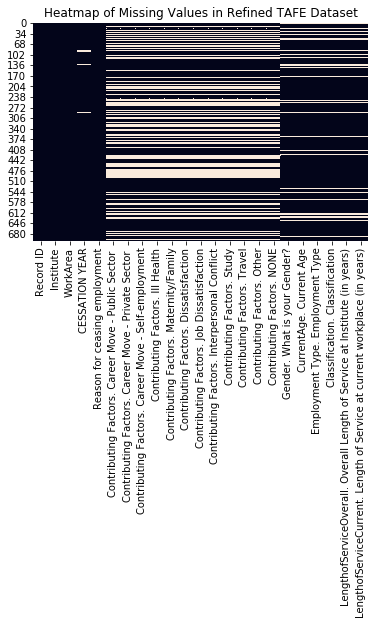

In [226]:
plt.figure(figsize=(6,4))
sns.heatmap(tafe.isnull(), cbar=False)
plt.title('Heatmap of Missing Values in Refined TAFE Dataset')
plt.show()

# Cleaning the Data

Both datasets contain inconsistencies regarding column names.  We want to clean the names for both sets and combine them along matching columns.

### DETE Column Names

In [227]:
dete.columns = dete.columns.str.strip().str.replace('\s+','_').str.lower()
dete.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

### TAFE Column Names

Since many of the TAFE column names are too long to rename programmatically as above, we will establish a dictionary of renamings.  For now we will leave the 'Contributing Factors' columns untouched.

In [228]:
renamings = {
    'Record ID':'id',
    'CESSATION YEAR':'cease_date',
    'Reason for ceasing employment':'separationtype',
    'Gender. What is your Gender?':'gender',
    'CurrentAge. Current Age':'age',
    'Employment Type. Employment Type':'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',
}

In [229]:
tafe.rename(renamings, axis=1, inplace=True)
tafe.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Isolate Resignation Data

In this project we are only concerned with exit surveys that were generated due to employee resignations.  For this reason, we need to drop rows which have a 'separationtype' that is not resignation-related.

In [230]:
dete['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [231]:
tafe['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [232]:
# drop rows that have null values in this column
tafe = tafe[tafe['separationtype'].notna()]

In [233]:
dete_res = dete[dete['separationtype'].str.contains('Resignation')].copy()
tafe_res = tafe[tafe['separationtype'].str.contains('Resignation')].copy()

### Clean Dates

Some of the columns contain date values in inconsistent formats, notably the 'cease_date' column.  We will clean these dates by extracting the year from each.

We find that the data ranges from 2006 to 2014, and is most heavily concentrated in 2010-2014.

In [234]:
dete_res['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [235]:
dete_res['cease_date'] = dete_res['cease_date'].str.extract(r'[1-2]?[0-9]?/?([1-2][0-9]{3})').astype('float')

Below we can see the resulting date counts for each of the two datasets.

In [236]:
dete_res['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

2014.0     22
2013.0    146
2012.0    129
2010.0      2
2006.0      1
NaN        11
Name: cease_date, dtype: int64

In [237]:
tafe_res['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
NaN         5
Name: cease_date, dtype: int64

### Create Service Time

The TAFE data contains columns for service time, both for role and institution.  The DETE data does not contain these columns, but we can create them by manipulating the start and end dates.

In [238]:
dete_res['institute_service'] = dete_res['cease_date'] - dete_res['dete_start_date']
dete_res['role_service'] = dete_res['cease_date'] - dete_res['role_start_date']

### Identify Dissatisfied Employees

Each dataset has different columns for employees to express the reasons for leaving.  We will examine the exit surveys from resigning employees and lump them each into one of two categories: satisfied or dissatisfied.

The columns which we will take to indicate dissatisfaction are as follows:

DETE
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

TAFE
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

In [239]:
# map the tafe columns to True/False values
def update_dissatisfaction(value):
    if value == 'NaN':
        return np.nan
    elif value == '-':
        return False
    else:
        return True
    
tafe_res[['Contributing Factors. Dissatisfaction',
          'Contributing Factors. Job Dissatisfaction']] = tafe_res[['Contributing Factors. Dissatisfaction',
          'Contributing Factors. Job Dissatisfaction']].applymap(update_dissatisfaction)

After mapping the TAFE columns to boolean values, we create a new column 'dissatisfied' in both datasets which contains the appropriate boolean value given the input columns.

In [240]:
dete_dissatisfied = ['job_dissatisfaction', 'dissatisfaction_with_the_department','physical_work_environment',
                     'lack_of_recognition','lack_of_job_security', 'work_location', 'employment_conditions',
                     'work_life_balance', 'workload']
tafe_dissatisfied = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']

In [241]:
dete_res['dissatisfied'] = dete_res[['job_dissatisfaction', 'dissatisfaction_with_the_department','physical_work_environment',
                     'lack_of_recognition','lack_of_job_security', 'work_location', 'employment_conditions',
                     'work_life_balance', 'workload']].any(axis=1, skipna=False)

tafe_res['dissatisfied'] = tafe_res[['Contributing Factors. Dissatisfaction',
                                     'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

# Combine the Datasets

After cleaning both datasets extensively, we are now ready to combine them into a single set of employee exit surveys. Below is a list of columns that the new dataset will contain.

* id
* separationtype
* cease_date
* gender
* age
* employment_status
* institute_service
* role_service
* dissatisfied
* institute - indicates 'DETE' or 'TAFE' to show source of data

In [242]:
dete_res['institute'] = 'DETE'
tafe_res['institute'] = 'TAFE'

In [243]:
# select the columns to keep before combining
dete_merge = dete_res[['id','separationtype','cease_date','gender','age','employment_status',
'institute_service','dissatisfied','institute']]
tafe_merge = tafe_res[['id','separationtype','cease_date','gender','age','employment_status',
'institute_service','dissatisfied','institute']]

Finally, we combine the two datasets into a single one named 'combined'.  This new dataframe will contain all exit surveys from both organizations.

In [244]:
combined = pd.concat([dete_merge, tafe_merge], axis=0)

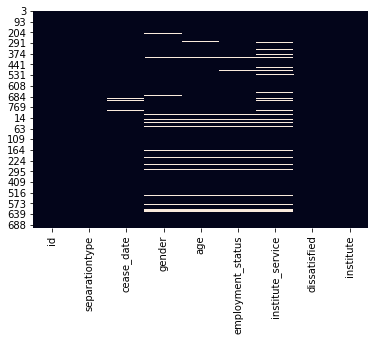

In [245]:
sns.heatmap(combined.isnull(), cbar=False)

### Cleaning Service Time

Before conducting analysis, we need to clean one bit of our data: the service time columns.  As seen below, service times are recorded in a number of different formats.

In [246]:
combined['institute_service'].astype('str')
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
19.0                   3
39.0                   3
21.0                   3
32.0                   3
25.0                   2
26.0                   2
36.0                   2
28.0                   2
30.0                   2


Instead of using numeric values for service time, we will instead convert into a categorical approach, using the groupings defined in this [BusinessWire article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage).

Four Key Career Stages (BusinessWire):
* 0-3 years - Newbie
* 4-7 years - Sophomore
* 8-10 years - Tenured
* 11+ years - Sage 

In [247]:
# get all service time values into float format
def update_service_time(val):
    val = str(val)
    if val == 'NaN':
        return np.nan
    elif '-' in val:
        s = val.split('-')
        first = s[0]
        second = s[1]
        return (float(first) + int(second)) / 2
    elif val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 20 years':
        return 20.5
    else:
        return float(val)

In [248]:
# categorize all service time values into one of the four categories
def categorize_service_time(val):
    if val < 4:
        return 'Newbie'
    elif val < 8:
        return 'Sophomore'
    elif val < 11:
        return 'Tenured'
    else:
        return 'Sage'

In [249]:
# apply both functions defined above and create new columns for results
combined['institute_service_num'] = combined['institute_service'].map(update_service_time)
combined['career_stage'] = combined['institute_service_num'].map(categorize_service_time)

# Data Analysis

Now we attempt to answer the questions we posed at the beginning:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?